# Analysis of the Data
Task:
    1. baseline subtraction
    2. area under the curve
   

In [1]:
pwd

'/home/fawad/PhD_DataAnalysis/oscilloscope/2014/Nov2014/Anim'

In [6]:
data='C2V22000000.dat'

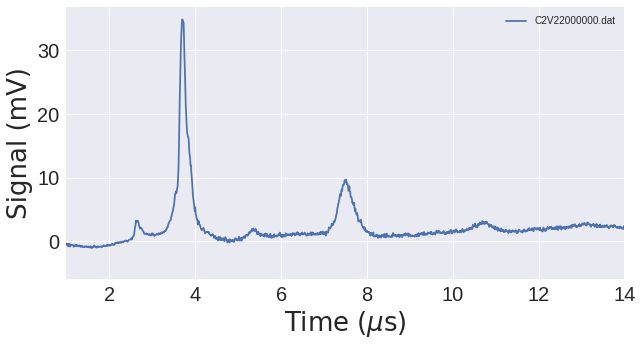

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df =pd.read_csv(data, sep =' ' ,names=['Time','Ampl'])
df['time_usec']= df['Time']*1e6
df['volt_mV'] = df['Ampl']* -1e3
ax = df.plot('time_usec','volt_mV', figsize=(10,5))
ax.set_xlim(1, 14)
ax.set_ylim(None, None)
ax.legend([data]) # plot legend should be the name of the file, which is in numFiles
ax.set_ylabel("Signal (mV)", fontname="DejaVu Sans", fontsize=26)
ax.set_xlabel("Time ($\mu$s)", fontname="DejaVu Sans", fontsize=26)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)


evaluate the baseline using peakutils.baseline()

In [19]:
import peakutils
baseline_values = peakutils.baseline(df['volt_mV'])

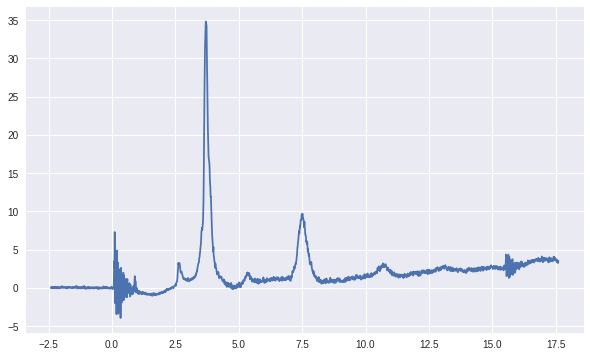

In [21]:
plt.figure(figsize=(10,6))
plt.plot(df['time_usec'] , df['volt_mV']);

The above plot shows that the curve has noise at the beginning and at the end. Which has to be removed. Lets cut those unwanted ends.

In [34]:
xlimits = (df['time_usec'] > 1 ) & (df['time_usec'] < 14)
newdf = df[xlimits]
newdf.head(5)

,Time,Ampl,time_usec,volt_mV
341,0.000001,0.000324,1.01,-0.323550
342,0.000001,0.000389,1.02,-0.388777
343,0.000001,0.000524,1.03,-0.524397
344,0.000001,0.000772,1.04,-0.771741
345,0.000001,0.000503,1.05,-0.503085


The top five lines of the new DataFrame `newdf` are thrown out using `newdf.head(5)`

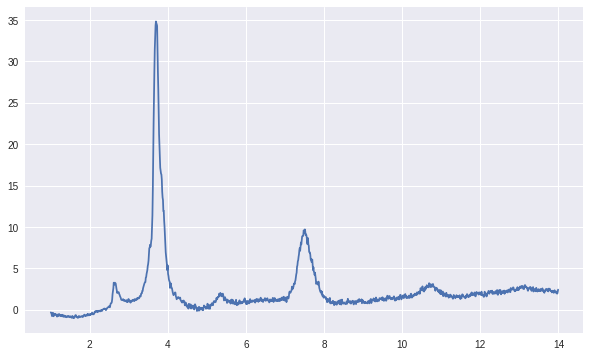

In [37]:
plt.figure(figsize=(10,6))
plt.plot(newdf['time_usec'] , newdf['volt_mV']);

Lets draw the baseline and plot it

In [35]:
baseline_values = peakutils.baseline(newdf['volt_mV'])

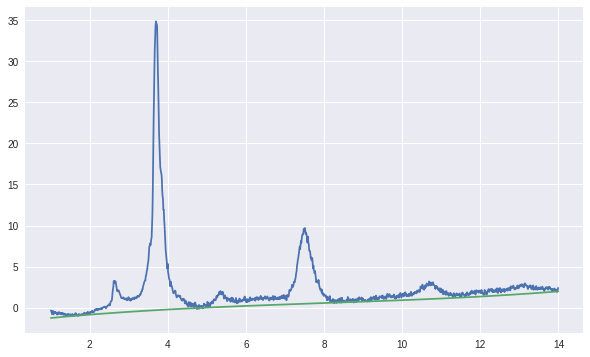

In [38]:
plt.figure(figsize=(10,6))
plt.plot(newdf['time_usec'],  newdf['volt_mV'] ,newdf['time_usec'] ,baseline_values);

Beautiful!   Now lets subtract the green baseline from the y-values, in this particular case from `newdf['volt_mV']`

In [42]:
newdf['y3'] = newdf['volt_mV'] - baseline_values
newdf.head()

/home/fawad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Time,Ampl,time_usec,volt_mV,y3
341,0.000001,0.000324,1.01,-0.323550,0.912219
342,0.000001,0.000389,1.02,-0.388777,0.842522
343,0.000001,0.000524,1.03,-0.524397,0.702441
344,0.000001,0.000772,1.04,-0.771741,0.450644
345,0.000001,0.000503,1.05,-0.503085,0.714855


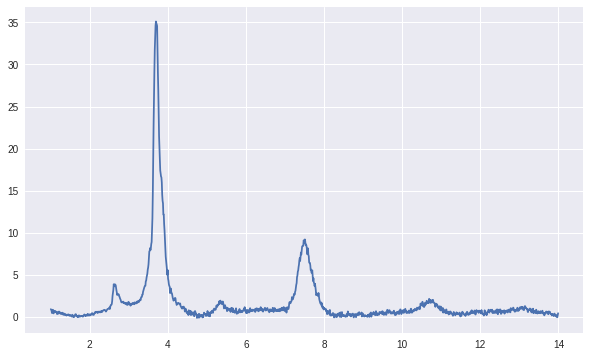

In [45]:
# lets plot it
plt.figure(figsize=(10,6))
plt.plot(newdf['time_usec'] , newdf['y3'])